In [ ]:
%cd c://Users//28763//Desktop//GraduationProjectCode

In [ ]:
import numpy as np
import sys
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import matplotlib as mpl

# sys.path.append("..")

from utils.DataLoader import *

loader = DataLoader("room1", 3)
data, frames = loader.load()

weighted = np.array([1, 1, 0.5])
tempData = data[data["timestamp"].eq("2019-07-15 21:22:36.322000")]

X = weighted * tempData.iloc[:, 2:5].values
dbscan = DBSCAN(eps=0.1, min_samples=5, metric="l2")
labels = dbscan.fit_predict(X)
unique_label = np.unique(labels)
labels, unique_label

In [ ]:
def get_cluster_centers(X, labels, unique_labels):
    cluster_centers = []
    for label in unique_labels:
        if label == -1:
            continue
        mask = labels == label
        if np.sum(mask) == 0:
            continue
        center = np.mean(X[mask, 0:2], axis=0)
        cluster_centers.append(center)
    return np.array(cluster_centers)

<Figure size 640x480 with 0 Axes>

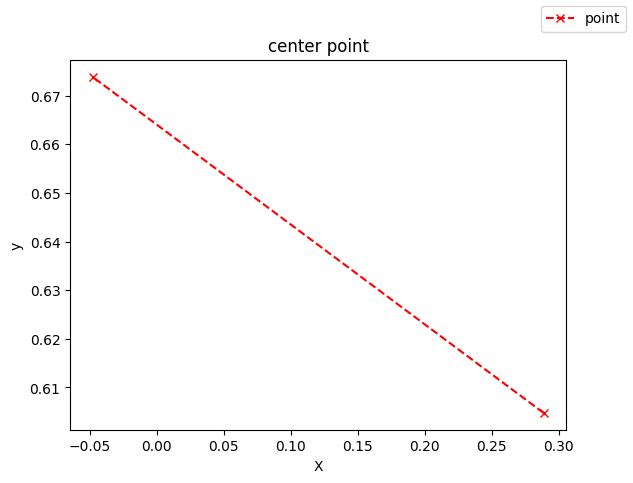

In [34]:
cluster_centers = get_cluster_centers(X, labels, unique_label)

fig2 = plt.figure()
fig2, ax2 = plt.subplots()

ax2.plot(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c="r",
    marker="x",
    linestyle="--",
    label="point",
)
ax2.set_xlabel("X")
ax2.set_ylabel("y")
ax2.set_title("center point")
fig2.legend()